# GR5293 Project 1
## Group member: Ares Wang(yw3626), 

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data =  pd.read_csv('dataset.csv', low_memory=False)

In [3]:
data.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655054,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631354537,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355638717,0.2021,674.0,1.0,0


In [4]:
print(f'Train data size: {data.shape}')

Train data size: (121856, 40)


### Data clean

In [119]:
# # Check duplicate data

# d1 = sum(data.duplicated())
# d2 = sum(test_data.duplicated())
# print(f'The duplicated data in train dataset is {d1}')
# print(f'The duplicated data in test dataset is {d2}')

# # Remove any irralevent columns

# drop_list = ['ID_Days',
#              'ID',
#              'Bike_Owned',
#              'Accompany_Client',
#              'Client_Gender',
#              'Loan_Contract_Type',
#              'Client_Housing_Type',
#              'Population_Region_Relative',
#              'Registration_Days',
#              'Employed_Days',
#              'Own_House_Age',
#              'Mobile_Tag', 
#              'Homephone_Tag', 
#              'Workphone_Working', 
#              'Application_Process_Day', 
#              'Application_Process_Hour',
#              'Client_Family_Members',
#              'Cleint_City_Rating',
#              'Client_Permanent_Match_Tag',
#              'Client_Contact_Work_Tag',
#              'Client_Occupation',
#              'Type_Organization',
#              'Phone_Change',
#              'Credit_Bureau'] 
# data1 = data.drop(drop_list, axis=1)
# data1.dtypes

In [5]:
d1 = sum(data.duplicated())
print(f'The duplicated data in train dataset is {d1}')

The duplicated data in train dataset is 0


In [6]:
data.isna().sum()

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating          

In [122]:
drop_list = [#'ID_Days',
             'ID',
            #  'Registration_Days',
            #  'Employed_Days',
            #  'Mobile_Tag', 
            #  'Homephone_Tag', 
            #  'Workphone_Working', 
            #  'Application_Process_Day', 
            #  'Application_Process_Hour',
            #  'Client_Permanent_Match_Tag',
            #  'Client_Contact_Work_Tag',
            #  'Client_Occupation',
            #  'Type_Organization',
            #  'Accompany_Client',
            #  'Phone_Change',
             'Own_House_Age'] #Since too many NA in Own_house_age
data1 = data.drop(drop_list, axis=1)
data1.dtypes

Client_Income                  object
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                  object
Loan_Annuity                   object
Accompany_Client               object
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative     object
Age_Days                       object
Employed_Days                  object
Registration_Days              object
ID_Days                        object
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation              object
Client_Family_Members         float64
Cleint_City_Rating            float64
Application_

In [123]:
def replace_value(value_now, default, values):
    if str(value_now) == 'nan':
        return values[default]
    else:
        return value_now

In [124]:
# Nas in Client_Income

data1.Client_Income = pd.to_numeric(data1.Client_Income, errors='coerce')
inc1 = data1.groupby('Default').median()['Client_Income']
data1.Client_Income = data1.apply(lambda x: replace_value(x['Client_Income'], 
                                                                      x['Default'], 
                                                                      inc1), 
                                              axis = 1)


(0.0, 100000.0)

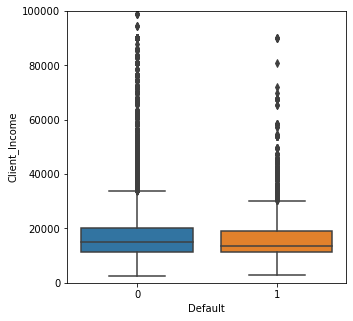

In [125]:
fig,ax = plt.subplots(1,1,figsize = (5,5))
sns.boxplot(y = data1.Client_Income, x = data1.Default, ax = ax)
ax.set_ylim((0,100000))

In [126]:
# Nas in Social_Circle_Default
data1.Social_Circle_Default = pd.to_numeric(data1.Social_Circle_Default, errors='coerce')
scd = data1.groupby('Default').mean()['Social_Circle_Default']
data1.Social_Circle_Default = data1.apply(lambda x: replace_value(x['Social_Circle_Default'],
                                                                              x['Default'], scd), 
                                                      axis = 1)

# Nas in Cleint_City_Rating
data1.Cleint_City_Rating = pd.to_numeric(data1.Cleint_City_Rating, errors='coerce')
ccr = data1.groupby('Default').mean()['Cleint_City_Rating']
data1.Cleint_City_Rating = data1.apply(lambda x: replace_value(x['Cleint_City_Rating'],
                                                                              x['Default'], ccr), 
                                                 axis = 1)

In [127]:
# Nas in Employed_Days
data1.Employed_Days = pd.to_numeric(data1.Employed_Days, errors='coerce')
emd = data1.groupby('Default').median()['Employed_Days']
data1.Employed_Days = data1.apply(lambda x: replace_value(x['Employed_Days'],
                                                                              x['Default'], emd), 
                                                 axis = 1)

# Nas in Registration_Days
data1.Registration_Days = pd.to_numeric(data1.Registration_Days, errors='coerce')
rgd = data1.groupby('Default').median()['Registration_Days']
data1.Registration_Days = data1.apply(lambda x: replace_value(x['Registration_Days'],
                                                                              x['Default'], rgd), 
                                                 axis = 1)  
# Nas in Application_Process_Day
data1.Application_Process_Day = pd.to_numeric(data1.Application_Process_Day, errors='coerce')
apd = data1.groupby('Default').median()['Application_Process_Day']
data1.Application_Process_Day = data1.apply(lambda x: replace_value(x['Application_Process_Day'],
                                                                              x['Default'], apd), 
                                                 axis = 1)  

# Nas in Application_Process_Hour
data1.Application_Process_Hour = pd.to_numeric(data1.Application_Process_Hour, errors='coerce')
aph = data1.groupby('Default').median()['Application_Process_Hour']
data1.Application_Process_Hour = data1.apply(lambda x: replace_value(x['Application_Process_Hour'],
                                                                              x['Default'], aph), 
                                                 axis = 1)       

# Nas in ID_Days
data1.ID_Days = pd.to_numeric(data1.ID_Days, errors='coerce')
idd = data1.groupby('Default').median()['ID_Days']
data1.ID_Days = data1.apply(lambda x: replace_value(x['ID_Days'],
                                                                              x['Default'], idd), 
                                                 axis = 1)                                              

In [128]:
print(data1.Employed_Days.describe())
print(data1.Registration_Days.describe())

count    121856.000000
mean      65200.896378
std      137313.925054
min           0.000000
25%         962.000000
50%        2296.000000
75%        5385.000000
max      365243.000000
Name: Employed_Days, dtype: float64
count    121856.000000
mean       4960.919068
std        3462.806612
min           0.000000
25%        2102.000000
50%        4532.000000
75%        7350.000000
max       23738.000000
Name: Registration_Days, dtype: float64


<AxesSubplot:xlabel='Default', ylabel='Cleint_City_Rating'>

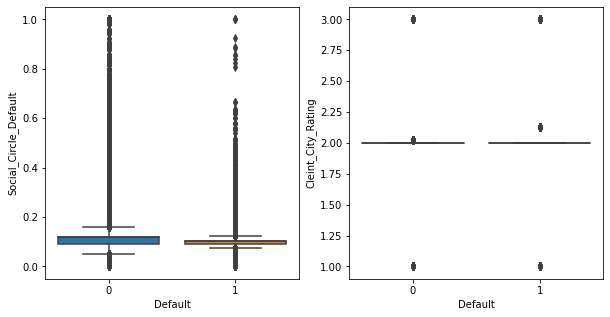

In [129]:
fig,ax = plt.subplots(1,2,figsize = (10,5))
sns.boxplot(y = data1.Social_Circle_Default, x = data1.Default, ax = ax[0])
sns.boxplot(y = data1.Cleint_City_Rating, x = data1.Default, ax = ax[1])

In [130]:
# Nas in Credit_Amount
data1.Credit_Amount = pd.to_numeric(data1.Credit_Amount, errors='coerce')
data1.dropna(subset=['Credit_Amount'], inplace=True)

<AxesSubplot:xlabel='Default', ylabel='Credit_Amount'>

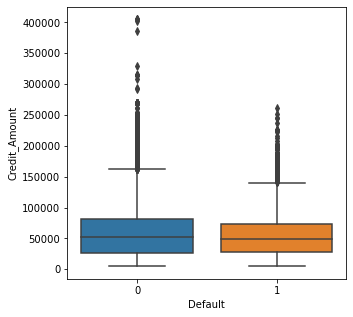

In [131]:
fig,ax = plt.subplots(1,1,figsize = (5,5))
sns.boxplot(y = data1.Credit_Amount, x = data1.Default, ax = ax)

In [132]:
# Nas in Car_Owned
data1.Car_Owned = data1.Car_Owned.fillna(value =0)

# Nas in Car_Owned
data1.Bike_Owned = data1.Bike_Owned.fillna(value =0)

# Nas in Active_Loan
data1.Active_Loan = data1.Active_Loan.fillna(value =0)

# Nas in House_Own
data1.House_Own = data1.House_Own.fillna(value =0)

# Nas in Child_Count
data1.Child_Count = data1.Child_Count.fillna(value =0)

# Nas in Client_Family_Members
data1.Client_Family_Members = data1.Client_Family_Members.fillna(value =0)

# Nas in Credit_Bureau
data1.Credit_Bureau = data1.Credit_Bureau.fillna(value =0)


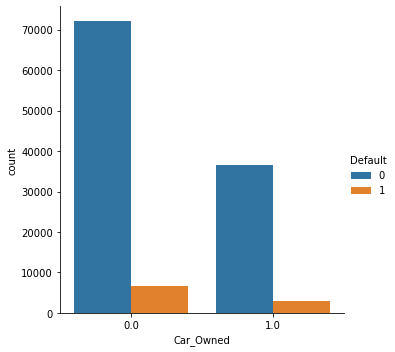

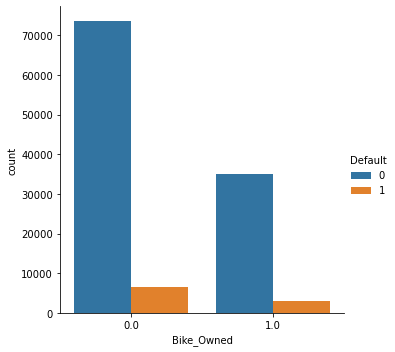

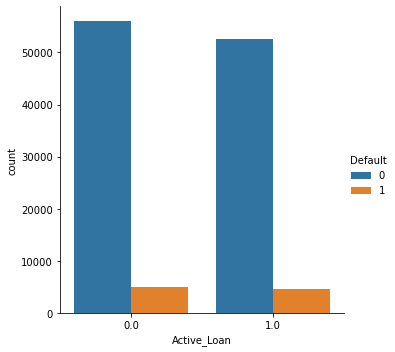

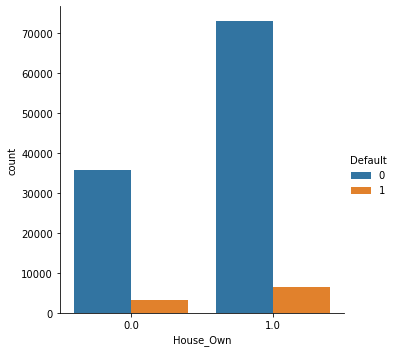

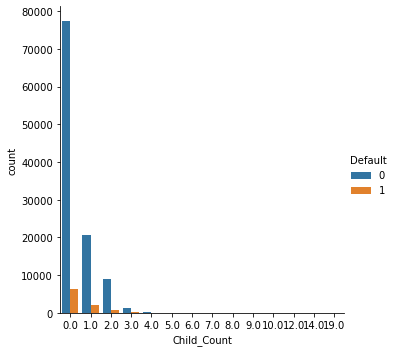

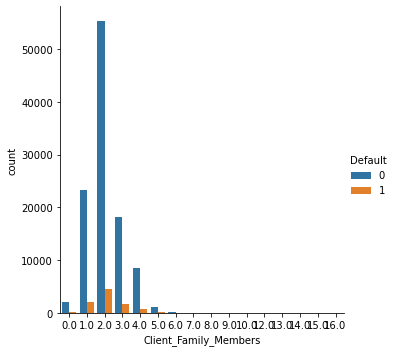

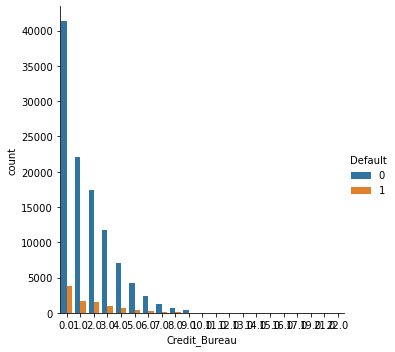

In [133]:
sns.catplot(x = 'Car_Owned', kind = 'count', hue='Default', data =data1)
sns.catplot(x = 'Bike_Owned', kind = 'count', hue='Default', data =data1)
sns.catplot(x = 'Active_Loan', kind = 'count', hue='Default', data =data1)
sns.catplot(x = 'House_Own', kind = 'count', hue='Default', data =data1)
sns.catplot(x = 'Child_Count', kind = 'count', hue='Default', data =data1)
sns.catplot(x = 'Client_Family_Members', kind = 'count', hue='Default', data =data1)
sns.catplot(x = 'Credit_Bureau', kind = 'count', hue='Default', data =data1)

In [134]:
# Nas in Loan_Contract_Type, Client_Housing_Type, Population_Region_Relative
data1.Population_Region_Relative = pd.to_numeric(data1.Population_Region_Relative, errors='coerce')
data1.dropna(subset=['Loan_Contract_Type', 
                     'Client_Housing_Type', 
                     'Population_Region_Relative'], inplace=True)

In [135]:
# Transform the categorical variables to numerical
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
data1.Loan_Contract_Type = le1.fit_transform(data1.Loan_Contract_Type)

le2 = LabelEncoder()
data1.Client_Housing_Type = le2.fit_transform(data1.Client_Housing_Type)

In [136]:
# Nas in Client_Education
data1.Client_Education = data1.Client_Education.fillna('Unknown')
le3 = LabelEncoder()
data1.Client_Education = le3.fit_transform(data1.Client_Education)

# Nas in Client_Gender
data1.Client_Gender = data1.Client_Gender.fillna('Unknown')
le4 = LabelEncoder()
data1.Client_Gender = le4.fit_transform(data1.Client_Gender)

# Nas in Client_Marital_Status
data1.Client_Marital_Status = data1.Client_Marital_Status.fillna('Unknown')
le5 = LabelEncoder()
data1.Client_Marital_Status = le5.fit_transform(data1.Client_Marital_Status)

# Nas in Client_Income_Type
data1.Client_Income_Type = data1.Client_Income_Type.fillna('Unknown')
le6 = LabelEncoder()
data1.Client_Income_Type = le6.fit_transform(data1.Client_Income_Type)

# # Nas in Type_Organization
# data1.Type_Organization = data1.Type_Organization.fillna('Unknown')
# le7 = LabelEncoder()
# data1.Type_Organization = le7.fit_transform(data1.Type_Organization)

# Nas in Client_Occupation
data1.Client_Occupation = data1.Client_Occupation.fillna('Unknown')
le8 = LabelEncoder()
data1.Client_Occupation = le8.fit_transform(data1.Client_Occupation)

In [137]:
data1.loc[data1.Type_Organization=='XNA','Type_Organization'] ='Unknown'
data1.Type_Organization = data1.Type_Organization.fillna('Unknown')


In [138]:
def sector(x):
    sec = x.lower().split('type')[0]
    return sec

def type_org(x):
    try:
        typ = x.lower().split('type')[1]
        return int(typ)
    except:
        return 0

data1['Client_sector'] = data1.apply(lambda x: sector(x['Type_Organization']), axis=1)
data1['Client_type'] = data1.apply(lambda x: type_org(x['Type_Organization']), axis=1)
data1.drop(['Type_Organization'], inplace=True, axis=1)
le7 = LabelEncoder()
data1.Client_sector = le7.fit_transform(data1.Client_sector)

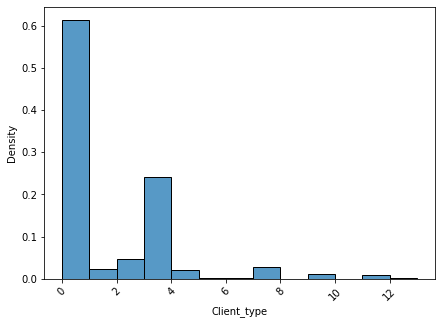

In [139]:
fig, ax = plt.subplots(1,1,figsize=(7,5)) 
sns.histplot(x = 'Client_type', stat = 'density', data =data1, ax=ax, binwidth=1)
ax.tick_params(axis='x', labelrotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34')])

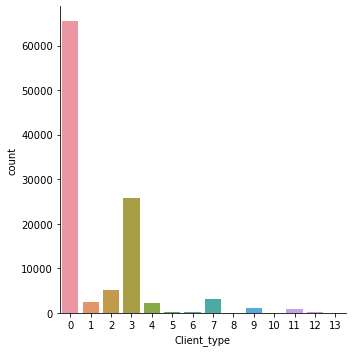

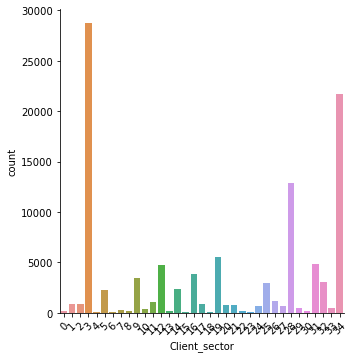

In [140]:
sns.catplot(x = 'Client_type', kind = 'count', data =data1)
sns.catplot(x = 'Client_sector', kind = 'count', data =data1)
plt.xticks(rotation=45)

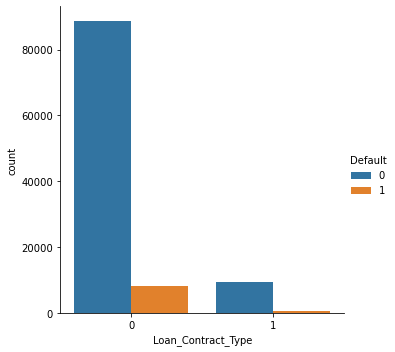

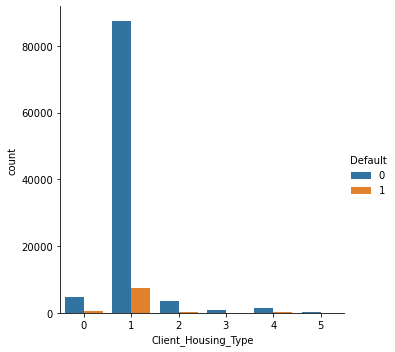

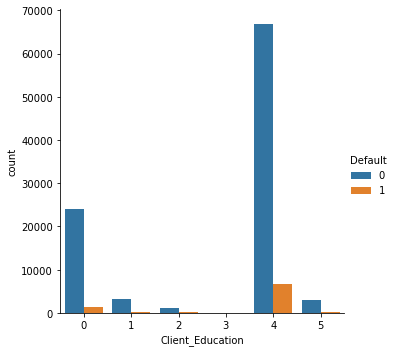

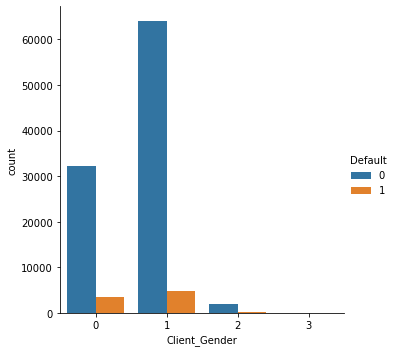

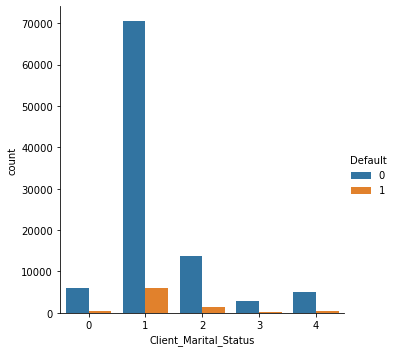

In [141]:
sns.catplot(x = 'Loan_Contract_Type', kind = 'count', hue='Default', data =data1)
sns.catplot(x = 'Client_Housing_Type', kind = 'count', hue='Default', data =data1)
sns.catplot(x = 'Client_Education', kind = 'count', hue='Default', data =data1)
sns.catplot(x = 'Client_Gender', kind = 'count', hue='Default', data =data1)
sns.catplot(x = 'Client_Marital_Status', kind = 'count', hue='Default', data =data1)


In [142]:
# Nas in Loan_Annuity, Age_Days 
data1.Age_Days = pd.to_numeric(data1.Age_Days, errors='coerce')
data1.Loan_Annuity = pd.to_numeric(data1.Loan_Annuity, errors='coerce')
data1.dropna(subset=['Loan_Annuity', 'Age_Days'], inplace=True)

<AxesSubplot:xlabel='Default', ylabel='Loan_Annuity'>

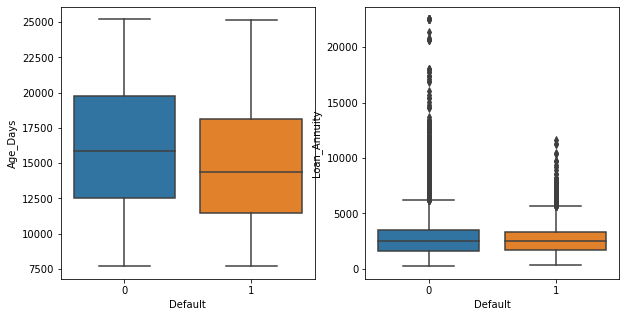

In [143]:
fig,ax = plt.subplots(1,2,figsize = (10,5))
sns.boxplot(y = data1.Age_Days, x = data1.Default, ax = ax[0])
sns.boxplot(y = data1.Loan_Annuity, x = data1.Default, ax = ax[1])

<AxesSubplot:xlabel='Default', ylabel='Age_Days'>

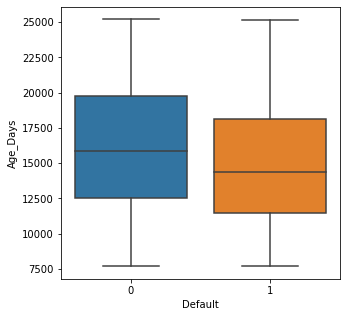

In [144]:
fig,ax = plt.subplots(1,1,figsize = (5,5))
sns.boxplot(y = data1.Age_Days, x = data1.Default, ax = ax )

In [145]:
# Nas in Score_Source_1
data1.Score_Source_1 = pd.to_numeric(data1.Score_Source_1, errors='coerce')
ss1 = data1.groupby('Default').mean()['Score_Source_1']
data1.Score_Source_1 = data1.apply(lambda x: replace_value(x['Score_Source_1'],
                                                                       x['Default'], ss1), 
                                               axis = 1)

# Nas in Score_Source_2
data1.Score_Source_2 = pd.to_numeric(data1.Score_Source_2, errors='coerce')
data1.loc[data1[data1.Score_Source_2 > 1].index,'Score_Source_2'] = 1
ss2 = data1.groupby('Default').mean()['Score_Source_2']
data1.Score_Source_2 = data1.apply(lambda x: replace_value(x['Score_Source_2'],
                                                                       x['Default'], ss2), 
                                               axis = 1)

# Nas in Score_Source_3
data1.Score_Source_3 = pd.to_numeric(data1.Score_Source_3, errors='coerce')
ss3 = data1.groupby('Default').mean()['Score_Source_3']
data1.Score_Source_3 = data1.apply(lambda x: replace_value(x['Score_Source_3'],
                                                                       x['Default'], ss3), 
                                               axis = 1)

<AxesSubplot:xlabel='Default', ylabel='Score_Source_3'>

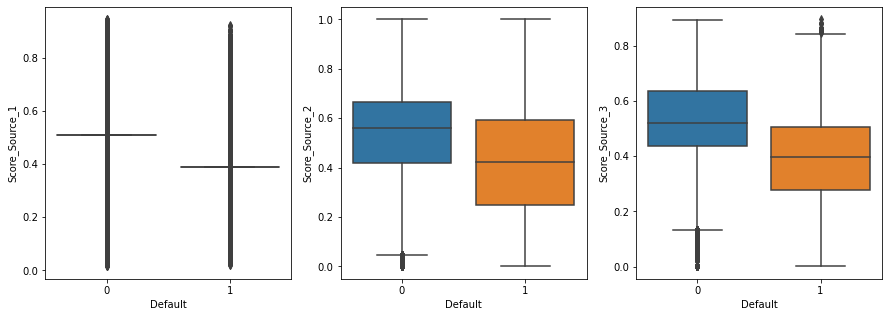

In [146]:
fig,ax = plt.subplots(1,3,figsize = (15,5))
sns.boxplot(y = data1.Score_Source_1, x = data1.Default, ax = ax[0])
sns.boxplot(y = data1.Score_Source_2, x = data1.Default, ax = ax[1])
sns.boxplot(y = data1.Score_Source_3, x = data1.Default, ax = ax[2])

In [147]:
# Nas in Accompany_Client
data1.Accompany_Client = data1.Accompany_Client.fillna('Alone')
le9 = LabelEncoder()
data1.Accompany_Client = le9.fit_transform(data1.Accompany_Client)

# Nas in Client_Permanent_Match_Tag
le10 = LabelEncoder()
data1.Client_Permanent_Match_Tag = le10.fit_transform(data1.Client_Permanent_Match_Tag)

# Nas in Client_Permanent_Match_Tag
le11 = LabelEncoder()
data1.Client_Contact_Work_Tag = le11.fit_transform(data1.Client_Contact_Work_Tag)

In [148]:
# Nas in Phone_Change
data1.Phone_Change = data1.Phone_Change.fillna(value =0)
le12 = LabelEncoder()
data1.Phone_Change = le12.fit_transform(data1.Phone_Change)
# Nas in Mobile_Tag
data1.Mobile_Tag = data1.Mobile_Tag.fillna(value =0)
le13 = LabelEncoder()
data1.Mobile_Tag = le13.fit_transform(data1.Mobile_Tag)

# Nas in Homephone_Tag
data1.Homephone_Tag = data1.Homephone_Tag.fillna(value =0)
le14 = LabelEncoder()
data1.Homephone_Tag = le14.fit_transform(data1.Homephone_Tag)

# Nas in Workphone_Working
data1.Workphone_Working = data1.Workphone_Working.fillna(value =0)
le15 = LabelEncoder()
data1.Homephone_Tag = le15.fit_transform(data1.Homephone_Tag)

In [149]:
# Check NAs in our final dataset
print(data1.isna().sum())
print(data1.shape)

Client_Income                 0
Car_Owned                     0
Bike_Owned                    0
Active_Loan                   0
House_Own                     0
Child_Count                   0
Credit_Amount                 0
Loan_Annuity                  0
Accompany_Client              0
Client_Income_Type            0
Client_Education              0
Client_Marital_Status         0
Client_Gender                 0
Loan_Contract_Type            0
Client_Housing_Type           0
Population_Region_Relative    0
Age_Days                      0
Employed_Days                 0
Registration_Days             0
ID_Days                       0
Mobile_Tag                    0
Homephone_Tag                 0
Workphone_Working             0
Client_Occupation             0
Client_Family_Members         0
Cleint_City_Rating            0
Application_Process_Day       0
Application_Process_Hour      0
Client_Permanent_Match_Tag    0
Client_Contact_Work_Tag       0
Score_Source_1                0
Score_So

In [150]:
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99531 entries, 0 to 121855
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Client_Income               99531 non-null  float64
 1   Car_Owned                   99531 non-null  float64
 2   Bike_Owned                  99531 non-null  float64
 3   Active_Loan                 99531 non-null  float64
 4   House_Own                   99531 non-null  float64
 5   Child_Count                 99531 non-null  float64
 6   Credit_Amount               99531 non-null  float64
 7   Loan_Annuity                99531 non-null  float64
 8   Accompany_Client            99531 non-null  int32  
 9   Client_Income_Type          99531 non-null  int32  
 10  Client_Education            99531 non-null  int32  
 11  Client_Marital_Status       99531 non-null  int32  
 12  Client_Gender               99531 non-null  int32  
 13  Loan_Contract_Type          99

In [151]:
# data1['Age_Years'] = np.round(data1.apply(lambda x: int(x['Age_Days']/365), axis=1))

# # Youger than 21 and older than 45:0
# # Between 21 and 45: 1

# # data1['Age_score'] = data1.apply(lambda x: 0 if x['Age_Years']<=21 else 1 if x['Age_Years']<=45 else 0, 
# #                                              axis=1)

In [152]:
clean_data = data1.copy()
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99531 entries, 0 to 121855
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Client_Income               99531 non-null  float64
 1   Car_Owned                   99531 non-null  float64
 2   Bike_Owned                  99531 non-null  float64
 3   Active_Loan                 99531 non-null  float64
 4   House_Own                   99531 non-null  float64
 5   Child_Count                 99531 non-null  float64
 6   Credit_Amount               99531 non-null  float64
 7   Loan_Annuity                99531 non-null  float64
 8   Accompany_Client            99531 non-null  int32  
 9   Client_Income_Type          99531 non-null  int32  
 10  Client_Education            99531 non-null  int32  
 11  Client_Marital_Status       99531 non-null  int32  
 12  Client_Gender               99531 non-null  int32  
 13  Loan_Contract_Type          99

In [153]:
# clean_data = data1.copy()
# drop_list2 = ['Car_Owned', 'House_Own', 'Child_Count','Client_Income_Type',
#               'Income_score','Education_score', 'Marital_score', 
#               'Score_Source_1', 'Score_Source_2', 'Score_Source_3',
#               'Client_Education','Client_Marital_Status','Age_Days',
#               'Child_score', 'Age_Years','Age_score','House_Own_score']
# clean_data.drop(drop_list2, axis=1,inplace=True)
# clean_data.info()

In [154]:
clean_data.Default

0         0
1         0
2         0
3         0
4         0
         ..
121851    1
121852    0
121853    0
121854    0
121855    0
Name: Default, Length: 99531, dtype: int64

In [159]:
np.unique(y_over, return_counts=True)[1]

array([91545, 91545], dtype=int64)

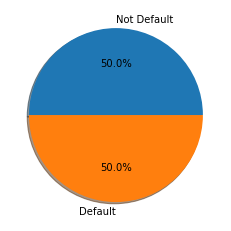

In [160]:
a = np.unique(y_over, return_counts=True)[1]
plt.pie(a, labels=['Not Default', "Default"], shadow=True, autopct='%1.1f%%')
plt.show()

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
y = clean_data['Default'].values
x = clean_data.drop(['Default'], axis=1)  # Age_years 好像也没有提升
x = StandardScaler().fit_transform(X=x)
X_over, y_over = RandomOverSampler(sampling_strategy='minority').fit_resample(x,y)
# train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.2, stratify=y, random_state=123)
train_X, test_X, train_y, test_y = train_test_split(X_over, y_over, test_size=0.2, stratify=y_over, random_state=123)
print(f'train_X shape: {train_X.shape}')
print(f'test_X shape: {test_X.shape}')
print(f'train_y shape: {train_y.shape}')
print(f'test_y shape: {test_y.shape}')

train_X shape: (146472, 38)
test_X shape: (36618, 38)
train_y shape: (146472,)
test_y shape: (36618,)


In [44]:
np.unique(train_y,return_counts=True)

(array([0, 1], dtype=int64), array([73236, 73236], dtype=int64))

In [45]:
np.unique(test_y, return_counts=True) # have the same proportion of 1s as train_y

(array([0, 1], dtype=int64), array([18309, 18309], dtype=int64))

In [46]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(train_y.reshape(-1,1))
train_y_ohe = ohe.transform(train_y.reshape(-1,1)).toarray()
test_y_ohe = ohe.transform(test_y.reshape(-1,1)).toarray()

In [48]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

mymodel = Sequential()
mymodel.add(Dense(256, activation='relu', input_shape = (38,)))
mymodel.add(Dense(256, activation='relu'))
mymodel.add(Dropout(0.3))
mymodel.add(Dense(128, activation='relu'))
mymodel.add(Dropout(0.2))
mymodel.add(Dense(2, activation='softmax'))
mymodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
mymodel.fit(train_X, train_y_ohe, validation_data=(test_X, test_y_ohe), epochs=20, shuffle=True,batch_size=300)

loss,score_cnn = mymodel.evaluate(test_X, test_y_ohe)
error_cnn = 1 - score_cnn
print(f'My test error is {error_cnn*100:0.2f}%')

Epoch 1/20
489/489 [==============================] - 5s 8ms/step - loss: 0.4023 - auc: 0.8991 - val_loss: 0.2927 - val_auc: 0.9459
Epoch 2/20
489/489 [==============================] - 3s 7ms/step - loss: 0.2781 - auc: 0.9506 - val_loss: 0.2569 - val_auc: 0.9588
Epoch 3/20
489/489 [==============================] - 3s 7ms/step - loss: 0.2412 - auc: 0.9620 - val_loss: 0.2279 - val_auc: 0.9657
Epoch 4/20
489/489 [==============================] - 3s 6ms/step - loss: 0.2123 - auc: 0.9698 - val_loss: 0.1944 - val_auc: 0.9747
Epoch 5/20
489/489 [==============================] - 3s 7ms/step - loss: 0.1868 - auc: 0.9757 - val_loss: 0.1704 - val_auc: 0.9790
Epoch 6/20
489/489 [==============================] - 3s 7ms/step - loss: 0.1673 - auc: 0.9795 - val_loss: 0.1585 - val_auc: 0.9802
Epoch 7/20
489/489 [==============================] - 3s 7ms/step - loss: 0.1495 - auc: 0.9829 - val_loss: 0.1447 - val_auc: 0.9829
Epoch 8/20
489/489 [==============================] - 3s 7ms/step - loss: 0.

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

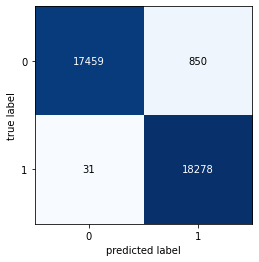

In [49]:
a = np.round(mymodel.predict(test_X))
b = ohe.inverse_transform(a)
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(test_y, b)
plot_confusion_matrix(cm)

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

model_tree = DecisionTreeClassifier(max_depth=5).fit(train_X, train_y)
model_tree.score(test_X, test_y)

0.9397290949806106

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

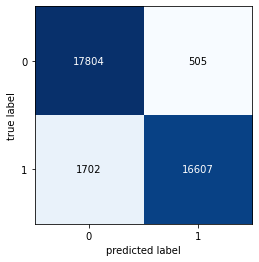

In [51]:
cm = confusion_matrix(test_y, model_tree.predict(test_X))
plot_confusion_matrix(cm)

In [58]:
from sklearn.ensemble import AdaBoostClassifier

model_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=30).fit(train_X, train_y)
model_ada.score(test_X, test_y)

0.9878475066906985

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

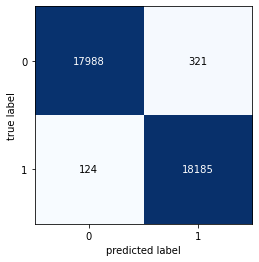

In [59]:
cm1 = confusion_matrix(test_y, model_ada.predict(test_X))
plot_confusion_matrix(cm1)

In [52]:
from sklearn.ensemble import RandomForestClassifier

model_rforest = RandomForestClassifier().fit(train_X, train_y)
model_rforest.score(test_X, test_y)

0.9986618602872904

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

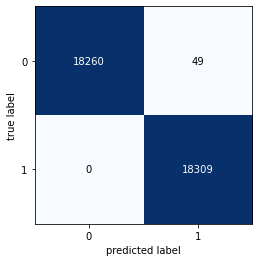

In [53]:
cm2 = confusion_matrix(test_y, model_rforest.predict(test_X))
plot_confusion_matrix(cm2)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

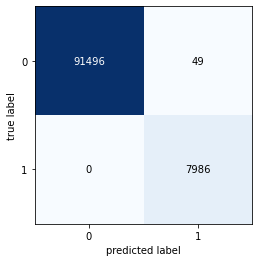

In [62]:
cm2 = confusion_matrix(y, model_rforest.predict(x)) # test the whole dataset 
plot_confusion_matrix(cm2)